# **Car Price Prediction Project**

**Objective:**

The primary goal of this project was to develop a model that can accurately predict car prices based on various features.

**Dataset:**

The dataset, sourced from Kaggle, comprises various features of different car models, including technical specifications and categorical attributes.

**Overview of the Process :**

1. Data Collection:

 * The dataset was imported, containing various features related to car specifications and prices.

2. Data Analysis and Preprocessing:

 * Exploratory Data Analysis (EDA): Initial examination of the dataset to understand its structure and summarize its main characteristics.
 * Handling Missing Values: Checked for any missing values and ensured the dataset was clean.
 * Feature Encoding: Categorical variables were encoded using Label Encoding to convert them into numerical values.
 * Data Standardization: Numerical features were standardized to ensure they have a mean of 0 and a standard deviation of 1, which helps in improving the performance of machine learning algorithms.

3. Correlation Analysis:

 * A correlation matrix was generated to understand the relationships between different features and identify any multicollinearity.

4. Feature Selection:

5. Model Selection and Evaluation:

 * Three different models were evaluated using cross-validation to determine their performance in predicting car prices

6. Model Training:

 * The dataset was split into training and testing sets. The XGBoost Regressor model was trained on the training data.

7. Model Evaluation:

 * The model's performance was evaluated on both the training and testing data.
 * Visualization of the actual vs. predicted prices was done .
8. Predictive System:

 * A predictive system was developed to allow users to input car specifications and predict the price using the trained XGBoost model.

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

### **1. Data Collection**

In [ ]:
car_dataset = pd.read_csv('/content/CarPrice_Assignment.csv')

link to dataset : https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv

In [ ]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car_dataset.shape

(205, 26)

In [ ]:
car_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### **2. Data Analysis and Preprocessing:**

In [ ]:
car_dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car_dataset.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [ ]:
columns = ['fueltype'	,'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation','enginetype'	,'cylindernumber'	, 'fuelsystem']

In [ ]:
for column in columns :
  print(car_dataset[column].value_counts())
  print("\n")

fueltype
gas       185
diesel     20
Name: count, dtype: int64


aspiration
std      168
turbo     37
Name: count, dtype: int64


doornumber
four    115
two      90
Name: count, dtype: int64


carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


enginelocation
front    202
rear       3
Name: count, dtype: int64


enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64




 * label encoding

In [ ]:
#columns that will be encoded using LabelEncoder
columns_need_encoding = ['fueltype'	,'aspiration',	'carbody',	'drivewheel',	'enginelocation','enginetype'	, 'fuelsystem']

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
tracker = {}
for column in columns_need_encoding :
  car_dataset[column] = label_encoder.fit_transform(car_dataset[column])
  tracker[column] = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))

In [ ]:
for column,mapping in tracker.items():
  print(f'{column} : {mapping}')

fueltype : {'diesel': 0, 'gas': 1}
aspiration : {'std': 0, 'turbo': 1}
carbody : {'convertible': 0, 'hardtop': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4}
drivewheel : {'4wd': 0, 'fwd': 1, 'rwd': 2}
enginelocation : {'front': 0, 'rear': 1}
enginetype : {'dohc': 0, 'dohcv': 1, 'l': 2, 'ohc': 3, 'ohcf': 4, 'ohcv': 5, 'rotor': 6}
fuelsystem : {'1bbl': 0, '2bbl': 1, '4bbl': 2, 'idi': 3, 'mfi': 4, 'mpfi': 5, 'spdi': 6, 'spfi': 7}


In [ ]:
car_dataset.replace({'doornumber':{'four':4,'two':2},'cylindernumber':{'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}},inplace=True)

In [ ]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


 * Data Standardization

In [ ]:
columns_need_stardization = ['wheelbase',	'carlength',	'carwidth',	'carheight',	'curbweight','enginesize','boreratio'	,'stroke',	'compressionratio'	,'horsepower',	'peakrpm',	'citympg'	,'highwaympg']

In [ ]:
scaler = StandardScaler()

In [ ]:
car_dataset[columns_need_stardization] = scaler.fit_transform(car_dataset[columns_need_stardization])

In [ ]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,-1.690772,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,-1.690772,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,-0.708596,...,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,0.173698,...,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,0.107110,...,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,17450.0


### **3. Correlation Analysis**

<Axes: >

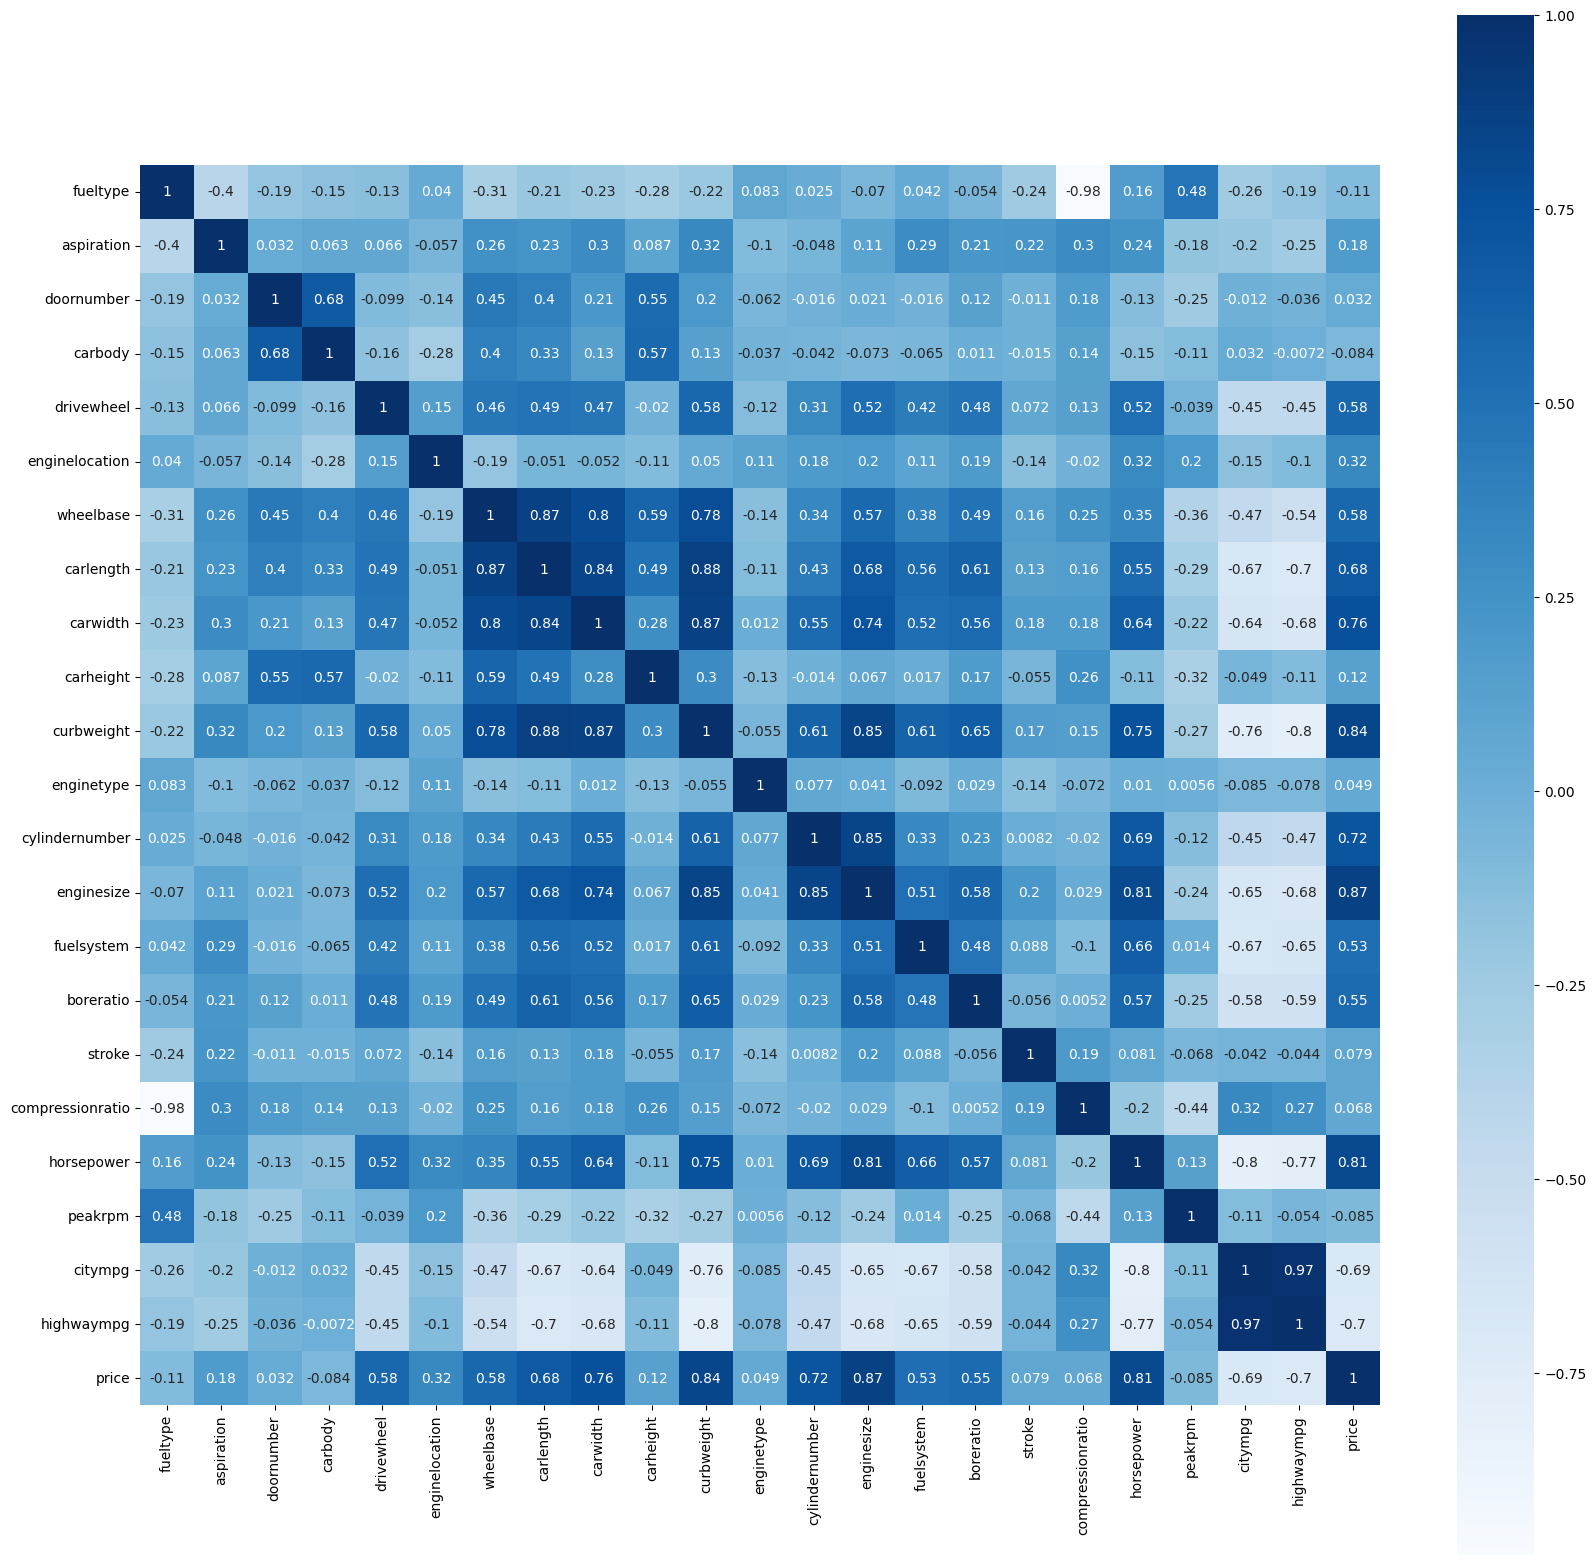

In [ ]:
#correlation
correlation = car_dataset.iloc[:,3:].corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':10},cmap='Blues')

### **4. Feature Selection**

In [ ]:
#spliting features and target
features = car_dataset.drop(columns=['car_ID',	'symboling',	'CarName','price'],axis=1)
target = car_dataset.price

In [ ]:
features

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,0,2,0,2,0,-1.690772,-0.426521,-0.844782,-2.020417,...,4,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1,0,2,0,2,0,-1.690772,-0.426521,-0.844782,-2.020417,...,4,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,1,0,2,2,2,0,-0.708596,-0.231513,-0.190566,-0.543527,...,6,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,1,0,4,3,1,0,0.173698,0.207256,0.136542,0.235942,...,4,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,1,0,4,3,0,0,0.107110,0.207256,0.230001,0.235942,...,5,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,4,3,2,0,1.721873,1.198549,1.398245,0.728239,...,4,0.339248,5,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490
201,1,1,4,3,2,0,1.721873,1.198549,1.351515,0.728239,...,4,0.339248,5,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195
202,1,0,4,3,2,0,1.721873,1.198549,1.398245,0.728239,...,6,1.109571,5,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332
203,0,1,4,3,2,0,1.721873,1.198549,1.398245,0.728239,...,6,0.435538,3,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059


In [ ]:
target

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

### **5. Model Selection and Evaluation**

In [ ]:
models = [LinearRegression(),Lasso(),XGBRegressor()]

In [ ]:
for model in models :
  scores = cross_val_score(model,features,target,cv=5,scoring='r2')

  mean_r2 = scores.mean()

  print(model)
  print(f'R2 Scores: {scores}')
  print(f'Mean R2: {mean_r2:.3f}')
  print('--------------------------------------')

LinearRegression()
R2 Scores: [ 0.63374203  0.81752031 -0.09361061  0.56852857  0.20057193]
Mean R2: 0.425
--------------------------------------
Lasso()
R2 Scores: [ 0.63844147  0.82021003 -0.07194135  0.5735425   0.20038178]
Mean R2: 0.432
--------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=No

* Interpretation:
 * Linear Regression and Lasso have similar performances, with Lasso performing slightly better in terms of mean R2.
 * XGBoost Regressor significantly outperforms both Linear Regression and Lasso with a mean R2 of 0.713, indicating it is better at explaining the variance in the target variable.
* Conclusion:
 * The XGBoost regressor is the best model among the three you evaluated based on the R2 metric, as it has the highest mean R2 score, indicating superior performance.

### **6. Model Training**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.1,random_state=2)

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### **7. Model Evaluation**

In [ ]:
#evaluation on training data
train_data_prediction = model.predict(X_train)

r2 = r2_score(Y_train,train_data_prediction)
mae = mean_absolute_error(Y_train,train_data_prediction)

print('R2 score :',r2)
print('Mean Absolute Error :',mae)

R2 score : 0.9988413378948585
Mean Absolute Error : 68.94052252462635


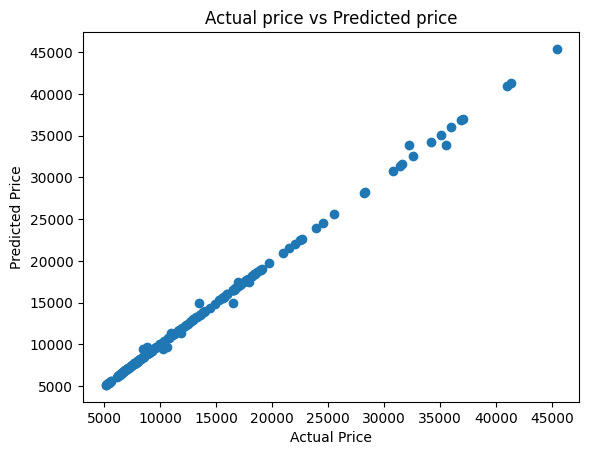

In [ ]:
#Visualize the actual prices and Predicted prices
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

In [ ]:
#evaluation on test data
test_data_prediction = model.predict(X_test)

r2 = r2_score(Y_test,test_data_prediction)
mae = mean_absolute_error(Y_test,test_data_prediction)

print('R2 score :',r2)
print('Mean Absolute Error :',mae)

R2 score : 0.8910544170893394
Mean Absolute Error : 1176.7642996651787


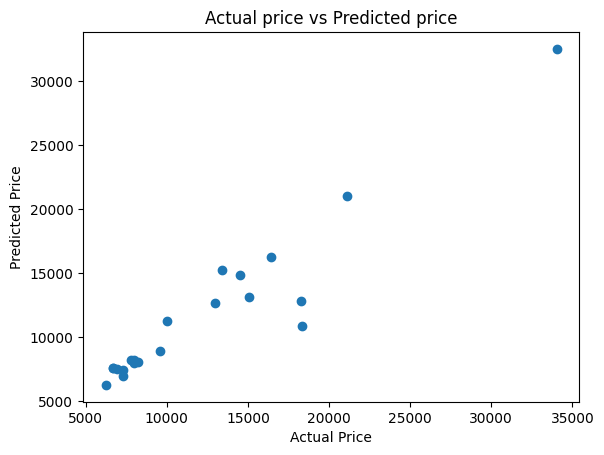

In [ ]:
#Visualize the actual prices and Predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

### **8. Predictive System**

In [ ]:
def predict_car_price(input_data):
  input_data = np.asarray(input_data)
  input_data = input_data.reshape(1,-1)
  df_input_data = pd.DataFrame(input_data,columns=car_dataset.columns[:-1])
  columns_need_encoding = ['fueltype'	,'aspiration',	'carbody',	'drivewheel',	'enginelocation','enginetype'	, 'fuelsystem']
  for column in columns_need_encoding :
    df_input_data[column] = label_encoder.fit_transform(df_input_data[column])
  df_input_data.replace({'doornumber':{'four':4,'two':2},'cylindernumber':{'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}},inplace=True)
  columns_need_stardization = ['wheelbase',	'carlength',	'carwidth',	'carheight',	'curbweight','enginesize','boreratio'	,'stroke',	'compressionratio'	,'horsepower',	'peakrpm',	'citympg'	,'highwaympg']
  for column in columns_need_stardization :
    df_input_data[columns_need_stardization] = scaler.transform(df_input_data[columns_need_stardization])
  X = df_input_data.iloc[:,3:]
  price = model.predict(X)
  print('Price is ',price[0],'$')

In [ ]:
input_data = car_dataset.iloc[11,:-1]

In [ ]:
predict_car_price(input_data)

Price is  9020.74 $
